In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)


# Data Exploration and Preprocessing: Understand your data. Handle missing values, encode categorical variables, and normalize numerical variables

In [2]:
df = pd.read_csv('train.csv')
#set Id as index
df.set_index('Id', inplace=True)
df.head(5)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 80)

In [4]:
# convert data types to object for categorical variables
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['OverallQual'] = df['OverallQual'].astype(object) #hierarchial
df['OverallCond'] = df['OverallCond'].astype(object) #hierarchial
#year to object
df['YearBuilt'] = df['YearBuilt'].astype(object)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(object)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(object)
df['MoSold'] = df['MoSold'].astype(object)
df['YrSold'] = df['YrSold'].astype(object)


In [ ]:
df.isna().sum()

In [6]:
#drop columns with more than 50% missing values
drop_list = ['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu']

for col in drop_list:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)
    
#impute missing values
#imput categorical variables with mode
for col in df.select_dtypes(include='object').columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
#impute numerical variables with median
for col in df.select_dtypes(include=np.number).columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [8]:
numeric_colmuns = []
numeric_colmuns.extend(list(df.dtypes[df.dtypes == np.int64].index))
numeric_colmuns.extend(list(df.dtypes[df.dtypes == np.float64].index))


In [9]:
categorical_columns = []
categorical_columns.extend(list(df.dtypes[df.dtypes == 'object'].index))


Visualize Distributions and Outliers

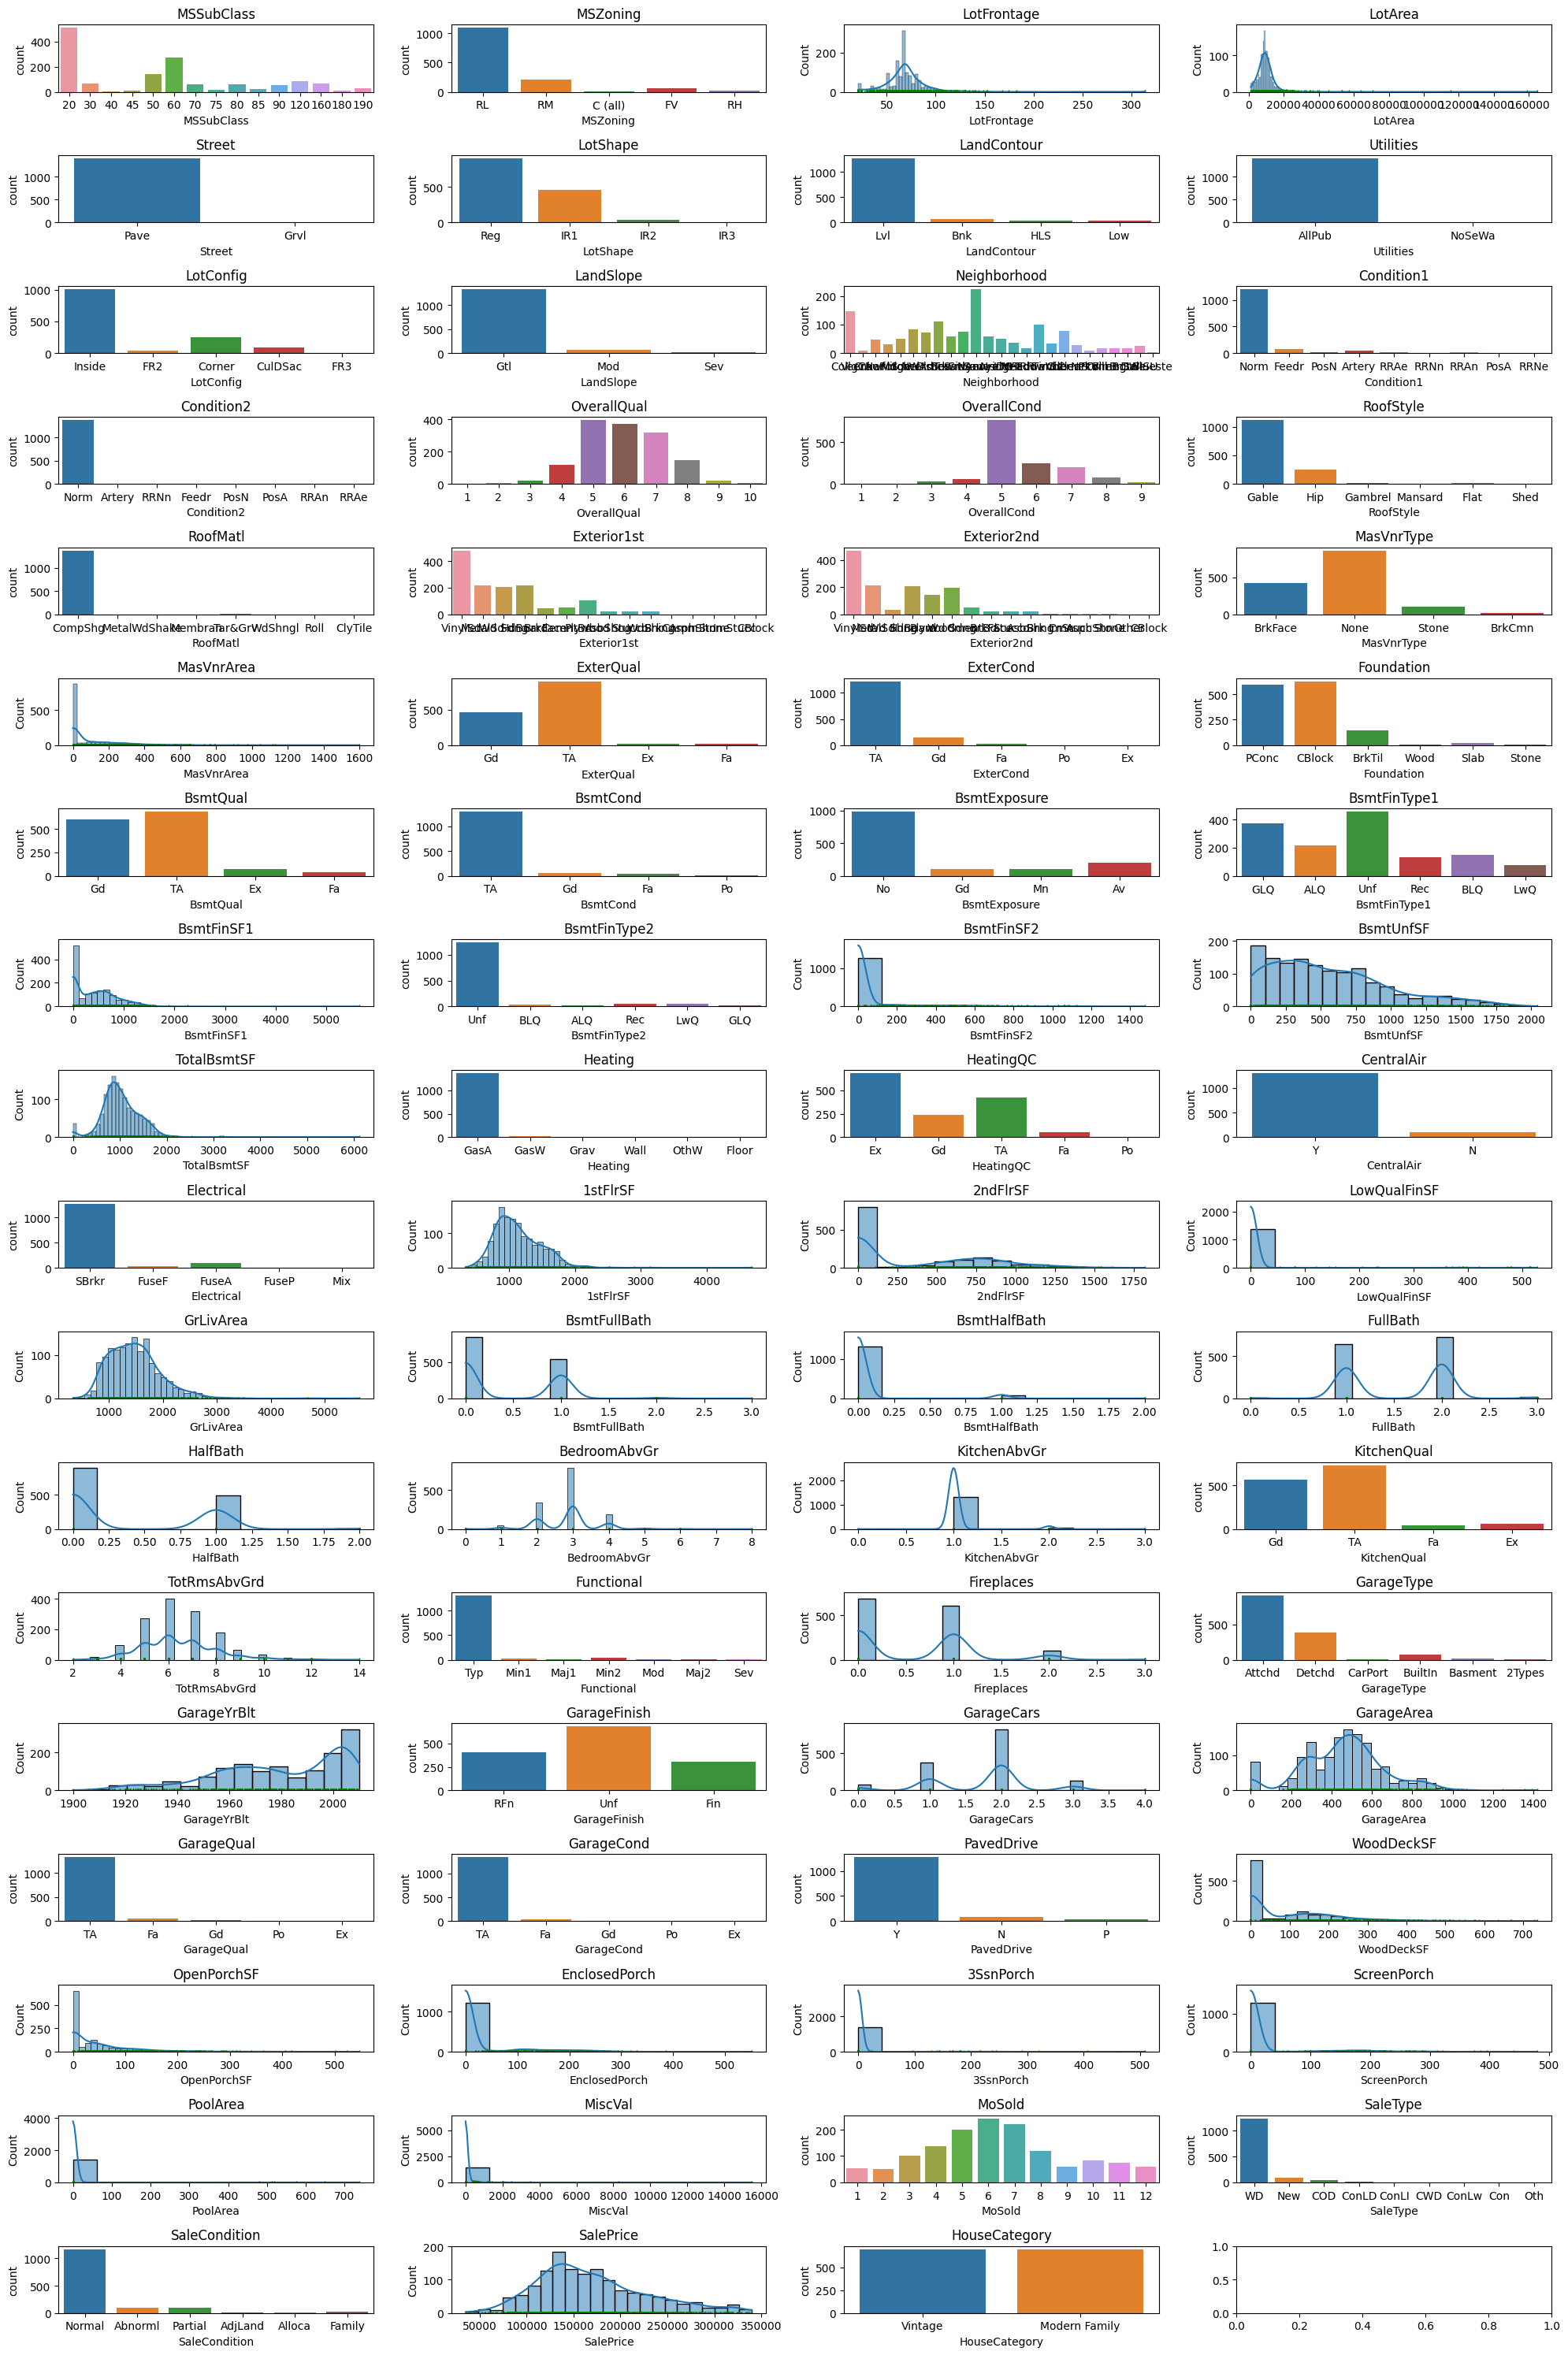

In [33]:
# Determine number of columns and rows for subplots
num_cols = 4
num_rows = len(df.columns) // num_cols + (1 if len(df.columns) % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Check if the column is numerical
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True, ax=ax)
        sns.rugplot(df[column], color="g", ax=ax)
    # If categorical, use count plot
    else:
        sns.countplot(x=column, data=df, ax=ax)
    
    ax.set_title(column)

plt.tight_layout()
plt.show()

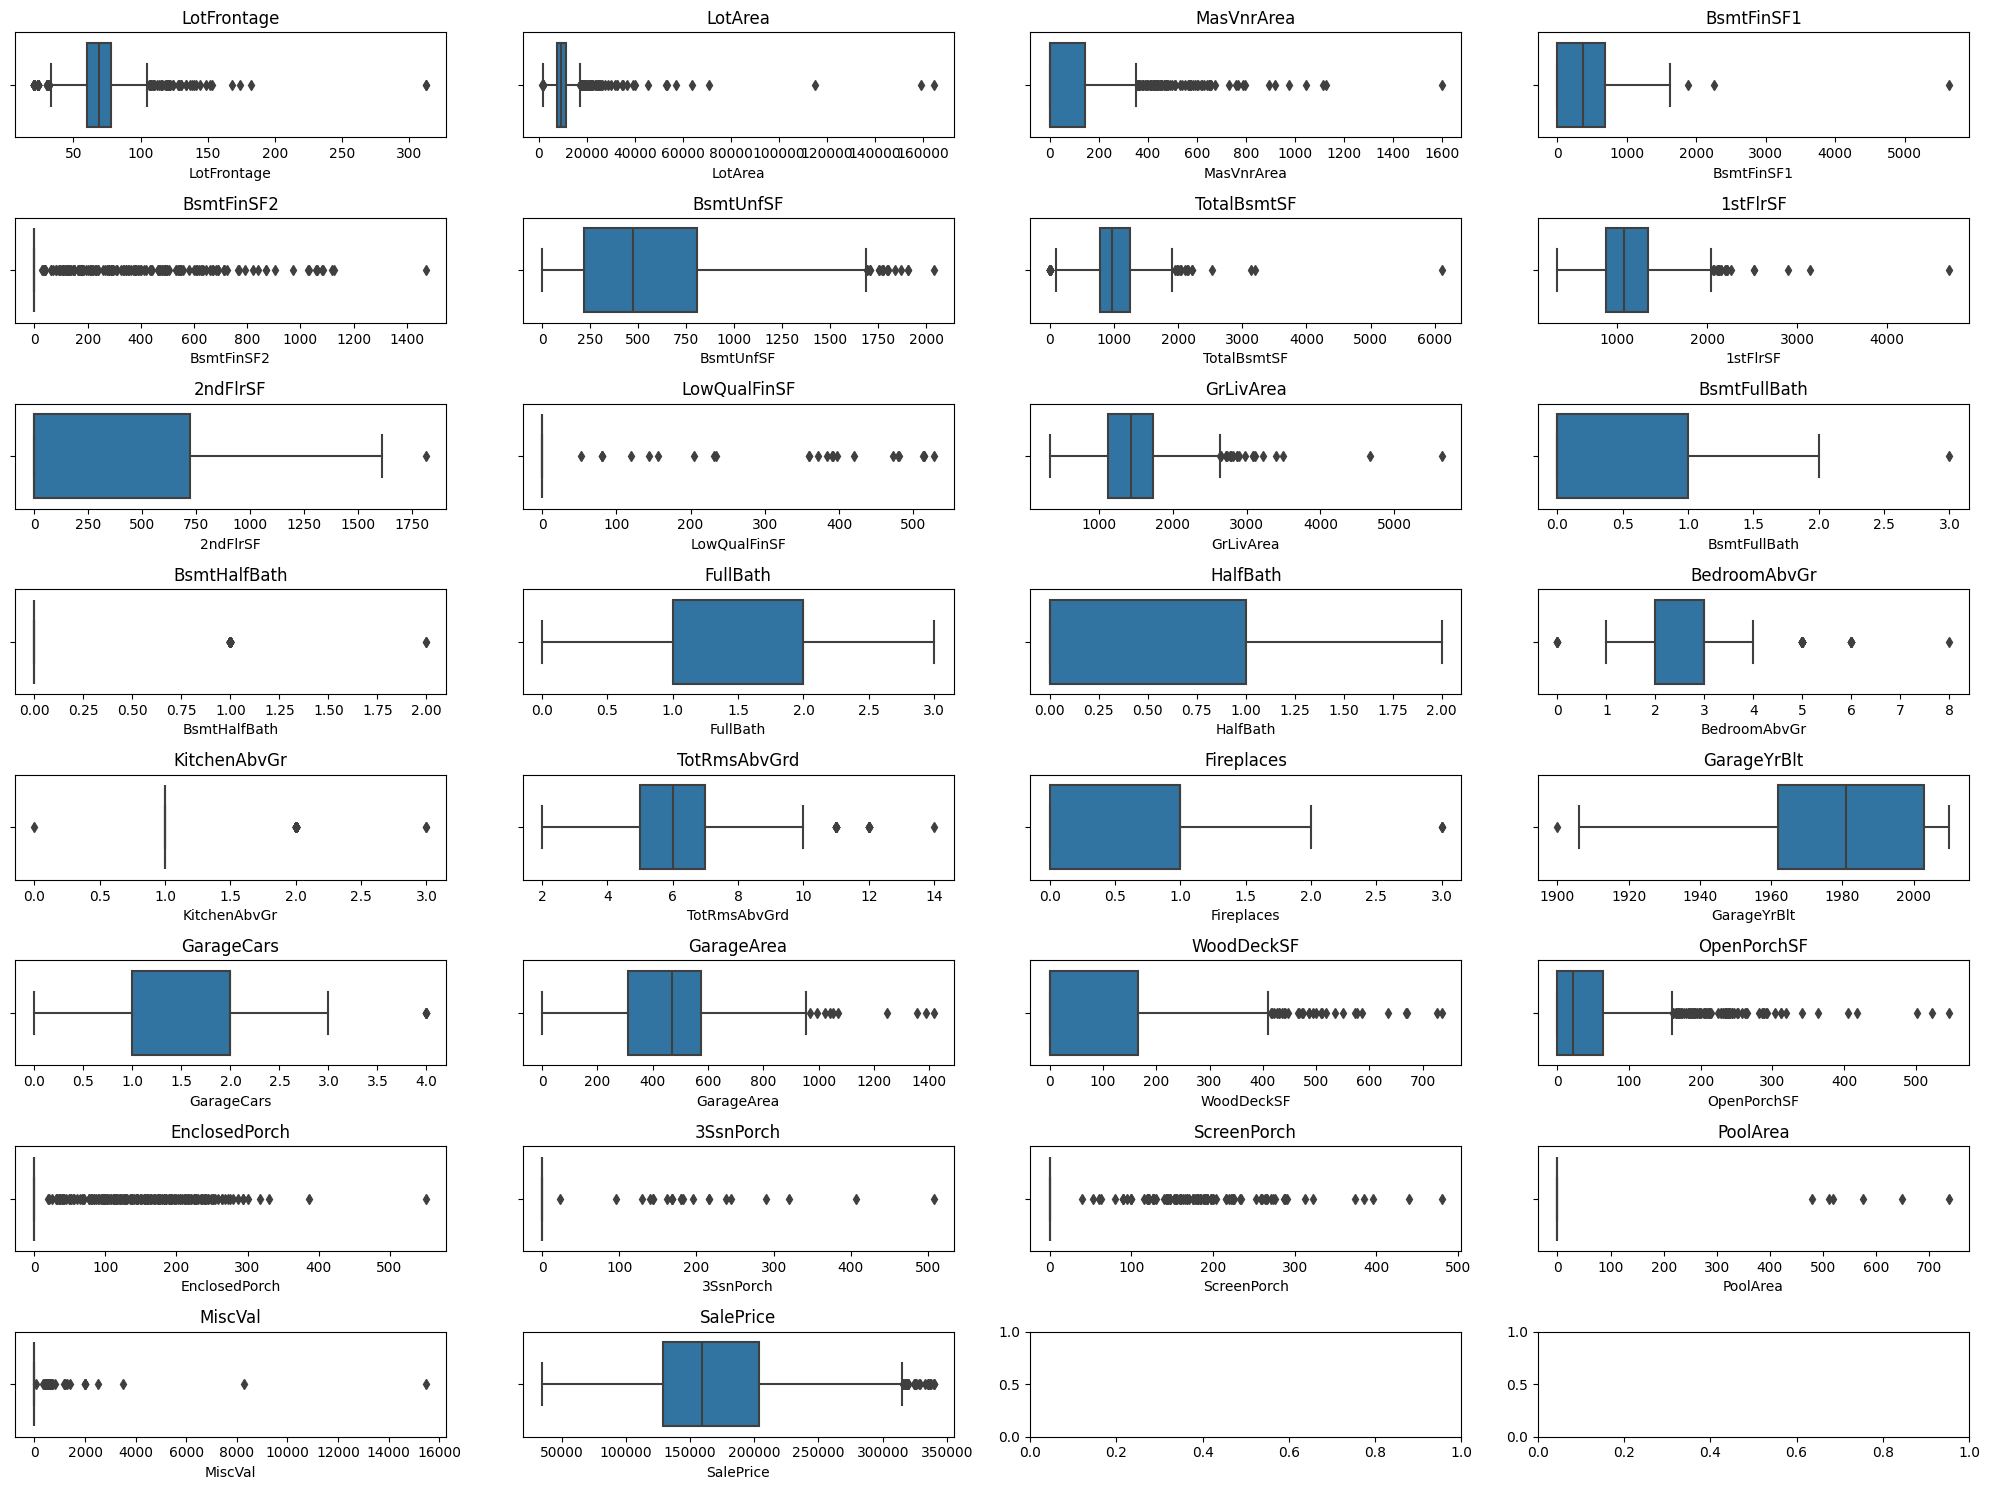

In [34]:
num_cols = 4
num_rows = (len(df.select_dtypes(include=np.number).columns) - 1) // num_cols + 1  # Adjusting rows to accommodate all numerical columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(x=column, data=df, orient="h", ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()


In [10]:
outliers_count = {}  # Dictionary to store the count of outliers for each numerical variable

# Loop through each numerical column
for column in df.select_dtypes(include=np.number).columns:
    # Calculate the quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Count the number of outliers
    outliers_count[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

# Print the number of outliers for each numerical variable
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")


LotFrontage: 106 outliers
LotArea: 69 outliers
MasVnrArea: 98 outliers
BsmtFinSF1: 7 outliers
BsmtFinSF2: 167 outliers
BsmtUnfSF: 29 outliers
TotalBsmtSF: 61 outliers
1stFlrSF: 20 outliers
2ndFlrSF: 2 outliers
LowQualFinSF: 26 outliers
GrLivArea: 31 outliers
BsmtFullBath: 1 outliers
BsmtHalfBath: 82 outliers
FullBath: 0 outliers
HalfBath: 0 outliers
BedroomAbvGr: 35 outliers
KitchenAbvGr: 68 outliers
TotRmsAbvGrd: 30 outliers
Fireplaces: 5 outliers
GarageYrBlt: 1 outliers
GarageCars: 5 outliers
GarageArea: 21 outliers
WoodDeckSF: 32 outliers
OpenPorchSF: 77 outliers
EnclosedPorch: 208 outliers
3SsnPorch: 24 outliers
ScreenPorch: 116 outliers
PoolArea: 7 outliers
MiscVal: 52 outliers
SalePrice: 61 outliers


# Remove outliers

In [12]:

# Define a function to remove outliers from a DataFrame
def remove_outliers(df):
    df_cleaned = df.copy()
    
    # Loop through each numerical column
    for column in df.select_dtypes(include=np.number).columns:
        # Calculate the quartiles and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the upper and lower bounds
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        
        outliers_count[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        
        if outliers_count[column]/df[column].shape[0] > 0.1: # remove outliers if greaer than 10% of the column values
            print(f"Removing {outliers_count[column]} outliers from {column}")
            # Filter out rows containing outliers
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Call the function to remove outliers from your DataFrame
df_cleaned = remove_outliers(df)


Removing 167 outliers from BsmtFinSF2
Removing 208 outliers from EnclosedPorch


In [13]:
df_cleaned.shape

(1115, 75)

Dataset Size has greatly reduced - Considering this outliers will not be removed considering already do not have enough data. So remove outliers from saleprice only

In [14]:
#sale price upper bound
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(f"Upper bound for SalePrice: {upper_bound}")
print(f"Lower bound for SalePrice: {lower_bound}")

df = df[(df['SalePrice'] <= upper_bound) & (df['SalePrice'] >= lower_bound)]


Upper bound for SalePrice: 340037.5
Lower bound for SalePrice: 3937.5


In [15]:
df.shape

(1399, 75)

# You will create a new variable 'House Category' based on 'House Style', 'Bldg Type', 'Year Built', and 'Year Remod/Add' for the classification task.

In [ ]:
#unique values in categorical columns to create building category 
list1 = ['HouseStyle', 'BldgType']
for col in list1:
    print(col, df[col].unique())
    if col != 'YearBuilt' and col != 'YearRemodAdd':
        print(df[col].value_counts())


In [17]:
df['YearBuilt'].min(), df['YearBuilt'].max(), df['YearRemodAdd'].min(), df['YearRemodAdd'].max()

(1872, 2009, 1950, 2010)

In [18]:
def create_house_category(row):
    # Age of the house based on the latest of either built year or remodel year
    age = max(2024 - row['YearBuilt'], 2024 - row['YearRemodAdd'])
    
    # Categorizing based on age
    if age <= 105:
        age_category = 'Modern'
    else:
        age_category = 'Vintage'
    
    # Combining Age, Style, and Type into a single category
    if row['HouseStyle'] in ['1Story', '1.5Fin', '1.5Unf'] and row['BldgType'] == '1Fam':
        style_type_category = 'Family'
    elif row['HouseStyle'] in ['2Story', '2.5Fin', '2.5Unf'] or row['BldgType'] == 'TwnhsE':
        style_type_category = 'Townhouse/Condo'
    else:
        style_type_category = 'Other'
    
    # Final category decision based on combined factors
    if style_type_category == 'Family' and age_category == 'Modern':
        return 'Modern Family'
    else:
        return 'Vintage'

df['HouseCategory'] = df.apply(create_house_category, axis=1)

In [19]:
df['HouseCategory'].value_counts()

Vintage          700
Modern Family    699
Name: HouseCategory, dtype: int64

In [20]:
df['HouseCategory'].isna().sum()

0

In [21]:
# Drop the original columns and year columns to avoid time series data
df.drop(['HouseStyle', 'BldgType','YearBuilt','YearRemodAdd','YrSold'], axis=1, inplace=True)


In [22]:
df.shape

(1399, 71)

Data Preprocessing Pipeline

Start by setting up the preprocessing pipeline for handling categorical encoding, normalizing numerical variables, and splitting the dataset into training, validation, and test sets.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


# Define categorical and numerical columns
categorical_columns = []
categorical_columns.extend(list(df.dtypes[df.dtypes == 'object'].index))
#drop target variable HouseCategory from this list
categorical_columns.remove('HouseCategory')

numerical_columns = []
numerical_columns.extend(list(df.dtypes[df.dtypes == np.int64].index))
numerical_columns.extend(list(df.dtypes[df.dtypes == np.float64].index))
#drop target variable SalePrice from this list
numerical_columns.remove('SalePrice')

# Separate features and target variables
X = df.drop(['SalePrice', 'HouseCategory'], axis=1)
y = df[['SalePrice', 'HouseCategory']]

# Encode 'HouseCategory' with label encoding for classification task
encoder = LabelEncoder()
y['HouseCategory'] = encoder.fit_transform(y['HouseCategory'])

# Define a column transformer for applying different preprocessing to categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore',sparse=False), categorical_columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# Utility function to extract feature names from the ColumnTransformer
def get_feature_names(column_transformer):
    # This will hold the output feature names
    output_features = []
    
    # Loop over all transformers in the column transformer
    for name, transformer, feature_names in column_transformer.transformers_:
        if name == 'remainder' and transformer == 'drop':  # if remainder is dropped
            continue
        elif name == 'remainder':  # if remainder needs to be passed as is
            for f in feature_names:
                output_features.append(f)
            continue
        if hasattr(transformer, 'get_feature_names_out'):  # check if transformer can provide feature names
            feature_names_out = transformer.get_feature_names_out(feature_names)
        elif hasattr(transformer, 'get_feature_names'):  # for older versions
            feature_names_out = transformer.get_feature_names()
        else:  # if no method available, assume it outputs feature_names directly
            feature_names_out = feature_names
        output_features.extend(feature_names_out)
    
    return output_features
# Fit and transform the datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_prepared = pd.DataFrame(pipeline.fit_transform(X_train), columns=get_feature_names(preprocessor))
X_val_prepared = pd.DataFrame(pipeline.transform(X_val), columns=get_feature_names(preprocessor))
X_test_prepared = pd.DataFrame(pipeline.transform(X_test), columns=get_feature_names(preprocessor))


# Separate the target variable
y_train_price = y_train['SalePrice']
y_val_price = y_val['SalePrice']
y_test_price = y_test['SalePrice']
y_train_category = y_train['HouseCategory']
y_val_category = y_val['HouseCategory']
y_test_category = y_test['HouseCategory']

# StandardScaler instance for the target
target_scaler = StandardScaler()

# Fit on training target data and transform
y_train_price_scaled = target_scaler.fit_transform(y_train_price.values.reshape(-1, 1))

# Transform validation and test target data
y_val_price_scaled = target_scaler.transform(y_val_price.values.reshape(-1, 1))
y_test_price_scaled = target_scaler.transform(y_test_price.values.reshape(-1, 1))


C:\Users\tashf\AppData\Local\Temp\ipykernel_4796\704700555.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['HouseCategory'] = encoder.fit_transform(y['HouseCategory'])


In [25]:
y_train_price.min(), y_train_price.max()

(34900, 340000)

In [26]:
y_train_price_scaled.min(), y_train_price_scaled.max(), y_val_price_scaled.min(), y_val_price_scaled.max()

(-2.2734205243828693,
 2.7972341494250546,
 -2.1886603184293443,
 2.7930792373685094)

In [27]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(label_mapping)

{'Modern Family': 0, 'Vintage': 1}


Create TensorDatasets

In [31]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert DataFrame to tensor
X_train_tensor = torch.tensor(X_train_prepared.values.astype(np.float32))
X_val_tensor = torch.tensor(X_val_prepared.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test_prepared.values.astype(np.float32))

# Prepare target tensors
y_train_price_tensor = torch.tensor(y_train_price_scaled.astype(np.float32))  # No squeeze
y_val_price_tensor = torch.tensor(y_val_price_scaled.astype(np.float32))      # No squeeze
y_test_price_tensor = torch.tensor(y_test_price_scaled.astype(np.float32)) 
y_train_category_tensor = torch.tensor(y_train['HouseCategory'].values.astype(np.int64))
y_val_category_tensor = torch.tensor(y_val['HouseCategory'].values.astype(np.int64))
y_test_category_tensor = torch.tensor(y_test['HouseCategory'].values.astype(np.int64))

# Combine features and targets into datasets
train_dataset = TensorDataset(X_train_tensor, y_train_price_tensor, y_train_category_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_price_tensor, y_val_category_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_price_tensor, y_test_category_tensor)

train_loader = DataLoader(train_dataset, batch_size=40, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=40)
test_loader = DataLoader(test_dataset, batch_size=40)



# Model 1
basic static archetructure 

cross entrpy loss function for calassficatoin

MSE for regression 

Adam Optimizer

Relu Activation function hidden layers

last classcification layer activation function to Sigmoid 

He weight initialization

In [ ]:
import optuna
import torch
import torch.optim as optim
import torch.nn as nn
import pytorch_lightning as pl
from torchmetrics import MeanSquaredError
from pytorch_lightning.loggers import TensorBoardLogger
from optuna.integration import PyTorchLightningPruningCallback
from torchmetrics import Accuracy, F1Score
from pytorch_lightning.callbacks import ModelCheckpoint
from torchmetrics import MeanSquaredError, Accuracy, F1Score, Precision, Recall, R2Score

import torch.nn.init as init  # Import torch.nn.init module
from sklearn.metrics import r2_score
from torchmetrics import MeanSquaredError
from torchmetrics import R2Score
import logging

# Models basic static archetructure 
# cross entrpy loss function for classificatoin
# MSE for regression 
# Adam Optimizer
# Relu Activation function hidden layers
# He weight initialization
# last classcification layer activation function to Sigmoid 


import torch.nn.init as init

# Set reduced logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)
logging.getLogger("optuna").setLevel(logging.WARNING)


class MultiTaskModel(pl.LightningModule):
    def __init__(self, input_dim, num_classes, params):
        super(MultiTaskModel, self).__init__()
        self.save_hyperparameters()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate'])
        )
        
        self.price_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], 1)
            
        )
        
        self.category_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], num_classes),
            nn.Sigmoid()
        )
        
        self.price_criterion = nn.MSELoss()
        self.category_criterion = nn.CrossEntropyLoss()
        
        self.price_metric = MeanSquaredError()
        self.category_metric = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.f1_score = F1Score(task='MULTICLASS', num_classes=num_classes, average='weighted')
        
        self.val_price_mse = MeanSquaredError()
        self.val_r2_score = R2Score() 
        
        
        self.train_accuracy = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.train_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_f1_score = F1Score(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        
        self.val_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.val_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        self.learning_rate = params['learning_rate']
        self.learning_rate_decay = params['learning_rate_decay']
        self.train_r2_score = R2Score()
        
        # Apply He initialization to all linear layers
        self._initialize_weights()
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')  # Apply He initialization for ReLU
                if m.bias is not None:
                    init.constant_(m.bias, 0) 
    
    def forward(self, x):
        shared_out = self.shared_layers(x)
        price_out = self.price_head_layers(shared_out)
        category_out = self.category_head_layers(shared_out)
        return price_out, category_out
    
    def training_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute losses
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_loss = price_loss + category_loss
        
        #log total loss
        self.log('total_train_loss', total_loss)
        
        self.train_r2_score.update(price_out, y_price)
        self.log('train_r2_score', self.train_r2_score.compute(), on_step=False, on_epoch=True)

        
        # Log train metrics
        self.log('train_price_mse', price_loss)
        
        
        # Update and log classification metrics
        self.train_accuracy.update(category_out, y_category)
        self.train_precision.update(category_out, y_category)
        self.train_recall.update(category_out, y_category)
        self.train_f1_score.update(category_out, y_category)
        self.log('train_accuracy', self.train_accuracy.compute())
        self.log('train_precision', self.train_precision.compute())
        self.log('train_recall', self.train_recall.compute())
        self.log('train_f1_score', self.train_f1_score.compute())
        
        return total_loss
    
    def validation_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        
        total_val_loss = price_loss + category_loss
        self.log('total_val_loss', total_val_loss)
        
        
        self.val_price_mse.update(price_out, y_price)
        self.val_r2_score.update(price_out, y_price)
        self.log('val_price_mse', self.val_price_mse.compute())
        self.log('val_r2_score', self.val_r2_score.compute())
        
        self.price_metric(price_out, y_price)
        self.category_metric(category_out, y_category)
        
        
        # Calculate accuracy
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('val_accuracy', accuracy, on_step=False, on_epoch=True)
        
        # Calculate F1 score
        f1 = self.f1_score(category_pred, y_category)
        self.log('val_f1_score', f1, on_step=False, on_epoch=True)
        # Update and log classification metrics
        self.val_precision.update(category_out, y_category)
        self.val_recall.update(category_out, y_category)
        self.log('val_precision', self.val_precision.compute())
        self.log('val_recall', self.val_recall.compute())
        
    
    def test_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute total test loss
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_test_loss = price_loss + category_loss
        
        # Log total test loss
        self.log('test_total_loss', total_test_loss, on_epoch=True)
        self.log('test_price_loss', price_loss, on_epoch=True)
        
        # Calculate and log accuracy for test data
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('test_accuracy', accuracy, on_epoch=True)
        
        # Calculate and log F1 score for test data
        f1 = self.f1_score(category_pred, y_category)
        self.log('test_f1_score', f1, on_epoch=True)
        
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=self.learning_rate_decay)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}


def objective(trial):
    params = {
        'hidden_size': trial.suggest_int('hidden_size', 100, 500),
        'dropout_rate': trial.suggest_uniform('dropout_rate', 0.0, 0.7),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
        'learning_rate_decay': trial.suggest_uniform('learning_rate_decay', 0.1, 0.99)
    }
    
    model = MultiTaskModel(input_dim=X_train_tensor.shape[1], num_classes=len(set(y_train_category)), params=params)
    
    logger = TensorBoardLogger("logs", name="multi_task_model")
    
    checkpoint_callback = ModelCheckpoint(
    monitor='total_val_loss',
    dirpath='models/',
    filename=f"multi-task-model-trial-{trial.number}-{{epoch:02d}}",
    save_top_k=1,
    mode='min',
    save_weights_only= False
)
    
    trainer = pl.Trainer(logger=logger, callbacks=[checkpoint_callback], max_epochs=3,enable_progress_bar=False,log_every_n_steps=50
                         )
    
    trainer.fit(model, train_loader, val_loader)
    
    
    trainer.logger.log_hyperparams(params)
    
    return trainer.callback_metrics['total_val_loss']


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1)

# Results of the best trial
best_trial = study.best_trial

print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.values}") 
print(f"  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

Load best model which was created using checkpoint and test it on test dataset

In [36]:
class MultiTaskModel(pl.LightningModule):
    def __init__(self, input_dim, num_classes, params):
        super(MultiTaskModel, self).__init__()
        self.save_hyperparameters()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate'])
        )
        
        self.price_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], 1)
            
        )
        
        self.category_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.ReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], num_classes),
            nn.Sigmoid()
        )
        
        self.price_criterion = nn.MSELoss()
        self.category_criterion = nn.CrossEntropyLoss()
        
        self.price_metric = MeanSquaredError()
        self.category_metric = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.f1_score = F1Score(task='MULTICLASS', num_classes=num_classes, average='weighted')
        
        self.val_price_mse = MeanSquaredError()
        self.val_r2_score = R2Score() 
        
        
        self.train_accuracy = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.train_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_f1_score = F1Score(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        
        self.val_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.val_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        self.learning_rate = params['learning_rate']
        self.learning_rate_decay = params['learning_rate_decay']
        self.train_r2_score = R2Score()
        
        # Apply He initialization to all linear layers
        self._initialize_weights()
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')  # Apply He initialization for ReLU
                if m.bias is not None:
                    init.constant_(m.bias, 0) 
    
    def forward(self, x):
        shared_out = self.shared_layers(x)
        price_out = self.price_head_layers(shared_out)
        category_out = self.category_head_layers(shared_out)
        return price_out, category_out
    
    def training_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute losses
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_loss = price_loss + category_loss
        
        #log total loss
        self.log('total_train_loss', total_loss)
        
        self.train_r2_score.update(price_out, y_price)
        self.log('train_r2_score', self.train_r2_score.compute(), on_step=False, on_epoch=True)

        
        # Log train metrics
        self.log('train_price_mse', price_loss)
        
        
        # Update and log classification metrics
        self.train_accuracy.update(category_out, y_category)
        self.train_precision.update(category_out, y_category)
        self.train_recall.update(category_out, y_category)
        self.train_f1_score.update(category_out, y_category)
        self.log('train_accuracy', self.train_accuracy.compute())
        self.log('train_precision', self.train_precision.compute())
        self.log('train_recall', self.train_recall.compute())
        self.log('train_f1_score', self.train_f1_score.compute())
        
        return total_loss
    
    def validation_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        
        total_val_loss = price_loss + category_loss
        self.log('total_val_loss', total_val_loss)
        
        
        self.val_price_mse.update(price_out, y_price)
        self.val_r2_score.update(price_out, y_price)
        self.log('val_price_mse', self.val_price_mse.compute())
        self.log('val_r2_score', self.val_r2_score.compute())
        
        self.price_metric(price_out, y_price)
        self.category_metric(category_out, y_category)
        
        
        # Calculate accuracy
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('val_accuracy', accuracy, on_step=False, on_epoch=True)
        
        # Calculate F1 score
        f1 = self.f1_score(category_pred, y_category)
        self.log('val_f1_score', f1, on_step=False, on_epoch=True)
        # Update and log classification metrics
        self.val_precision.update(category_out, y_category)
        self.val_recall.update(category_out, y_category)
        self.log('val_precision', self.val_precision.compute())
        self.log('val_recall', self.val_recall.compute())
        
    
    def test_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute total test loss
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_test_loss = price_loss + category_loss
        
        # Log total test loss
        self.log('test_total_loss', total_test_loss, on_epoch=True)
        self.log('test_price_loss', price_loss, on_epoch=True)
        
        # Calculate and log accuracy for test data
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('test_accuracy', accuracy, on_epoch=True)
        
        # Calculate and log F1 score for test data
        f1 = self.f1_score(category_pred, y_category)
        self.log('test_f1_score', f1, on_epoch=True)
        
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=self.learning_rate_decay)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}

In [37]:

checkpoint_path='D:\Google Drive\McGill\Winter Semester\W2\MGSC 673\Assignment 3\models\multi-task-model-trial-13-epoch=26.ckpt'
model = MultiTaskModel.load_from_checkpoint(checkpoint_path)
model.eval()

MultiTaskModel(
  (shared_layers): Sequential(
    (0): Linear(in_features=286, out_features=365, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.39284200806033287, inplace=False)
    (3): Linear(in_features=365, out_features=365, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.39284200806033287, inplace=False)
    (6): Linear(in_features=365, out_features=365, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.39284200806033287, inplace=False)
  )
  (price_head_layers): Sequential(
    (0): Linear(in_features=365, out_features=365, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.39284200806033287, inplace=False)
    (3): Linear(in_features=365, out_features=365, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.39284200806033287, inplace=False)
    (6): Linear(in_features=365, out_features=1, bias=True)
  )
  (category_head_layers): Sequential(
    (0): Linear(in_features=365, out_features=365, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.39284200806033287, inplace=False)
    (3): Linea

In [38]:
# Test the model
import torch
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, r2_score, precision_score, recall_score

# Ensure the model is in evaluation mode
model.eval()

# Lists to store outputs
price_outputs = []
category_outputs = []
actual_prices = []
actual_categories = []

# No gradient is needed for evaluation or testing
with torch.no_grad():
    for batch in test_loader:
        inputs, prices, categories = batch  # Adjust depending on how your data tuples are structured
        
        price_pred, category_pred = model(inputs)
        
        # Store predictions - you might want to detach and move the data to CPU
        price_outputs.append(price_pred.detach().cpu())
        category_outputs.append(category_pred.detach().cpu())
        
        # Store actuals
        actual_prices.append(prices.detach().cpu())
        actual_categories.append(categories.detach().cpu())

# You might want to concatenate all batches for further evaluation like calculating metrics
price_outputs = torch.cat(price_outputs, dim=0)
category_outputs = torch.cat(category_outputs, dim=0)
actual_prices = torch.cat(actual_prices, dim=0)
actual_categories = torch.cat(actual_categories, dim=0)
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score

# Calculate MSE and RMSE for price predictions
mse = mean_squared_error(actual_prices.numpy(), price_outputs.numpy())
rmse = mse ** 0.5
r2 = r2_score(actual_prices.numpy(), price_outputs.numpy())

# Calculate accuracy, F1-score, precision, and recall for category predictions
predicted_categories = torch.argmax(category_outputs, dim=1)
accuracy = accuracy_score(actual_categories.numpy(), predicted_categories.numpy())
f1 = f1_score(actual_categories.numpy(), predicted_categories.numpy(), average='weighted')
precision = precision_score(actual_categories.numpy(), predicted_categories.numpy(), average='weighted')
recall = recall_score(actual_categories.numpy(), predicted_categories.numpy(), average='weighted')

print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}, Accuracy: {accuracy}, F1-Score: {f1}, Precision: {precision}, Recall: {recall}")


MSE: 0.25277742743492126, RMSE: 0.5027697558872464, R2 Score: 0.6872934682732565, Accuracy: 0.9238095238095239, F1-Score: 0.9237264748755348, Precision: 0.9251579203109817, Recall: 0.9238095238095239


# Model 2

basic archietructure 

activatoin function tanh,

last classcification layer activation function to Sigmoid 

weight inititalzation Xavier,

Huber loss for regression

Cross entropy loss for classification

SGD Optimizer


In [31]:
import optuna
import torch
import torch.optim as optim
import torch.nn as nn
import pytorch_lightning as pl
from torchmetrics import MeanSquaredError
from pytorch_lightning.loggers import TensorBoardLogger
from optuna.integration import PyTorchLightningPruningCallback
from torchmetrics import Accuracy, F1Score
from pytorch_lightning.callbacks import ModelCheckpoint
from torchmetrics import MeanSquaredError, Accuracy, F1Score, Precision, Recall, R2Score

import torch.nn.init as init  # Import torch.nn.init module
from sklearn.metrics import r2_score
from torchmetrics import MeanSquaredError
from torchmetrics import R2Score
import logging



class HuberLoss(nn.Module):
    def __init__(self, delta=1.0):
        super(HuberLoss, self).__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        residual = torch.abs(y_pred - y_true)
        loss = torch.where(residual < self.delta, 0.5 * residual ** 2, self.delta * (residual - 0.5 * self.delta))
        return torch.mean(loss)

    
# basic archietructure 
# activatoin function tanh,
# last classcification layers activation function to Sigmoid 
# weight inititalzation Xavier,
# Huber loss for regression
# Cross entropy loss for classification
# SGD Optimizer
 
class MultiTaskModel_1(pl.LightningModule):
    def __init__(self, input_dim, num_classes, params):
        super(MultiTaskModel_1, self).__init__()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, params['hidden_size']),
            nn.Tanh(),  
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.Tanh(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.Tanh(),
            nn.Dropout(p=params['dropout_rate'])
        )
        
        self.price_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.Tanh(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.Tanh(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], 1)
        )
        
        self.category_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.Tanh(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.Tanh(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], num_classes),
            nn.Sigmoid()
        )
        

        self.price_criterion = nn.HuberLoss()
        self.category_criterion = nn.CrossEntropyLoss()
        
        self.price_metric = MeanSquaredError()
        self.category_metric = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.f1_score = F1Score(task='MULTICLASS', num_classes=num_classes, average='weighted')
        self.train_r2_score = R2Score()
        
        self.val_price_mse = MeanSquaredError()
        self.val_r2_score = R2Score() 
        
        
        self.train_accuracy = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.train_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_f1_score = F1Score(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        
        self.val_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.val_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        self.learning_rate = params['learning_rate']
        self.learning_rate_decay = params['learning_rate_decay']
        
        
        
        # Apply Xavier initialization to linear layers
        self._initialize_weights()
        
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)
    
    def forward(self, x):
        shared_out = self.shared_layers(x)
        price_out = self.price_head_layers(shared_out)
        category_out = self.category_head_layers(shared_out)
        return price_out, category_out
    
    def training_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute losses
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_loss = price_loss + category_loss
        
        #log total loss
        self.log('total_train_loss', total_loss)
        
        self.train_r2_score.update(price_out, y_price)
        self.log('train_r2_score', self.train_r2_score.compute(), on_step=False, on_epoch=True)

               
        # Update and log classification metrics
        self.train_accuracy.update(category_out, y_category)
        self.train_precision.update(category_out, y_category)
        self.train_recall.update(category_out, y_category)
        self.train_f1_score.update(category_out, y_category)
        self.log('train_accuracy', self.train_accuracy.compute())
        self.log('train_precision', self.train_precision.compute())
        self.log('train_recall', self.train_recall.compute())
        self.log('train_f1_score', self.train_f1_score.compute())
        
        # Log train metrics
        self.log('train_price_mse', price_loss)
        return total_loss
    
    def validation_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        
        total_val_loss = price_loss + category_loss
        self.log('total_val_loss', total_val_loss)
        
        self.val_price_mse.update(price_out, y_price)
        self.val_r2_score.update(price_out, y_price)
        self.log('val_price_mse', self.val_price_mse.compute())
        self.log('val_r2_score', self.val_r2_score.compute())
        
        self.price_metric(price_out, y_price)
        self.category_metric(category_out, y_category)
        
        
        # Calculate accuracy
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('val_accuracy', accuracy, on_step=False, on_epoch=True)
        
        # Calculate F1 score
        f1 = self.f1_score(category_pred, y_category)
        self.log('val_f1_score', f1, on_step=False, on_epoch=True)
        # Update and log classification metrics
        self.val_precision.update(category_out, y_category)
        self.val_recall.update(category_out, y_category)
        self.log('val_precision', self.val_precision.compute())
        self.log('val_recall', self.val_recall.compute())
    
    def test_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute total test loss
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_test_loss = price_loss + category_loss
        
        # Log total test loss
        self.log('test_total_loss', total_test_loss, on_epoch=True)
        
        # Calculate and log accuracy for test data
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('test_accuracy', accuracy, on_epoch=True)
        
        # Calculate and log F1 score for test data
        f1 = self.f1_score(category_pred, y_category)
        self.log('test_f1_score', f1, on_epoch=True)
        
    def configure_optimizers(self):
        optimizer = optim.SGD(self.parameters(), lr=self.learning_rate)  # Change optimizer to SGD
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=self.learning_rate_decay)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}


def objective(trial):
    params = {
        'hidden_size': trial.suggest_int('hidden_size', 100, 500),
        'dropout_rate': trial.suggest_uniform('dropout_rate', 0.0, 0.7),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
        'learning_rate_decay': trial.suggest_uniform('learning_rate_decay', 0.1, 0.99)
    }
    
    model_1 = MultiTaskModel_1(input_dim=X_train_tensor.shape[1], num_classes=len(set(y_train_category)), params=params)  # Change model to MultiTaskModel_1
    
    logger = TensorBoardLogger("logs_1", name="multi_task_model_1")
    
    checkpoint_callback = ModelCheckpoint(
    monitor='total_val_loss',
    dirpath='models_1/',
    filename=f"multi-task-model-trial-{trial.number}-{{epoch:02d}}",
    save_top_k=1,
    mode='min',
    save_weights_only= False
    )
    
    trainer = pl.Trainer(logger=logger, callbacks=[checkpoint_callback], max_epochs=30,enable_progress_bar=False,log_every_n_steps=50)
    
    trainer.fit(model_1, train_loader, val_loader)
    
    # save hyperparameters
    trainer.logger.log_hyperparams(params)
    
    return trainer.callback_metrics['total_val_loss']


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)

best_trial = study.best_trial
print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")
print(f"  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

C:\Users\tashf\AppData\Local\Temp\ipykernel_33072\1352842190.py:212: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'dropout_rate': trial.suggest_uniform('dropout_rate', 0.0, 0.7),
C:\Users\tashf\AppData\Local\Temp\ipykernel_33072\1352842190.py:213: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
C:\Users\tashf\AppData\Local\Temp\ipykernel_33072\1352842190.py:214: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate_decay': trial.suggest_uniform('learning_rate_decay', 0.1

Best trial: 12
  Value: 0.5061537027359009
  Params: 
    hidden_size: 441
    dropout_rate: 0.013847130000337257
    learning_rate: 0.009891315371105765
    learning_rate_decay: 0.9673405228560352


# Model: 3

basic archietructure 

activatoin function PreLU for hidden layers

Change last classcification layers activation function to LogSoftmax 

weight inititalzation He,

Log-Cosh Loss regression

Cross entropy loss for classification

RMSProp Optimizer

In [32]:
import optuna
import torch
import torch.optim as optim
import torch.nn as nn
import pytorch_lightning as pl
from torchmetrics import MeanSquaredError
from pytorch_lightning.loggers import TensorBoardLogger
from optuna.integration import PyTorchLightningPruningCallback
from torchmetrics import Accuracy, F1Score
from pytorch_lightning.callbacks import ModelCheckpoint
from torchmetrics import MeanSquaredError, Accuracy, F1Score, Precision, Recall, R2Score

import torch.nn.init as init  # Import torch.nn.init module
from sklearn.metrics import r2_score
from torchmetrics import MeanSquaredError
from torchmetrics import R2Score
import logging



class HuberLoss(nn.Module):
    def __init__(self, delta=1.0):
        super(HuberLoss, self).__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        residual = torch.abs(y_pred - y_true)
        loss = torch.where(residual < self.delta, 0.5 * residual ** 2, self.delta * (residual - 0.5 * self.delta))
        return torch.mean(loss)

    
# basic archietructure 
# activatoin function PreLU for hidden layers
# Change last classcification layers activation function to LogSoftmax 
# weight inititalzation He,
# Log-Cosh Loss regression
# Cross entropy loss for classification
# RMSProp Optimizer
 
# Custom Log-Cosh loss function
class LogCoshLoss(nn.Module):
    def __init__(self):
        super(LogCoshLoss, self).__init__()
    
    def forward(self, input, target):
        cosh = torch.cosh(input - target)
        return torch.mean(torch.log(cosh + 1e-12))  # Adding a small value to prevent log(0)
    
    
class MultiTaskModel_1(pl.LightningModule):
    def __init__(self, input_dim, num_classes, params):
        super(MultiTaskModel_1, self).__init__()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, params['hidden_size']),
            nn.PReLU(),  
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.PReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.PReLU(),
            nn.Dropout(p=params['dropout_rate'])
        )
        
        self.price_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.PReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.PReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], 1)
        )
        
        self.category_head_layers = nn.Sequential(
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.PReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], params['hidden_size']),
            nn.PReLU(),
            nn.Dropout(p=params['dropout_rate']),
            nn.Linear(params['hidden_size'], num_classes),
            nn.LogSoftmax() # Change activation function to LogSoftmax for NLLLoss (Negative Log-Likelihood Loss) 
        )
        

        self.price_criterion = LogCoshLoss()
        
        self.category_criterion = nn.NLLLoss()
        
        self.price_metric = MeanSquaredError()
        self.category_metric = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.f1_score = F1Score(task='MULTICLASS', num_classes=num_classes, average='weighted')
        self.train_r2_score = R2Score()
        
        self.val_price_mse = MeanSquaredError()
        self.val_r2_score = R2Score() 
        
        
        self.train_accuracy = Accuracy(task='MULTICLASS', num_classes=num_classes)
        self.train_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.train_f1_score = F1Score(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        
        self.val_precision = Precision(task='MULTICLASS',num_classes=num_classes, average='weighted')
        self.val_recall = Recall(task='MULTICLASS',num_classes=num_classes, average='weighted')
        
        self.learning_rate = params['learning_rate']
        self.learning_rate_decay = params['learning_rate_decay']
        
        
        
        # Apply He initialization to linear layers
        self._initialize_weights()
        
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')  # Apply He initialization for ReLU
                if m.bias is not None:
                    init.constant_(m.bias, 0) 
    
    def forward(self, x):
        shared_out = self.shared_layers(x)
        price_out = self.price_head_layers(shared_out)
        category_out = self.category_head_layers(shared_out)
        return price_out, category_out
    
    def training_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute losses
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_loss = price_loss + category_loss
        
        #log total loss
        self.log('total_train_loss', total_loss)
        
        self.train_r2_score.update(price_out, y_price)
        self.log('train_r2_score', self.train_r2_score.compute(), on_step=False, on_epoch=True)

               
        # Update and log classification metrics
        self.train_accuracy.update(category_out, y_category)
        self.train_precision.update(category_out, y_category)
        self.train_recall.update(category_out, y_category)
        self.train_f1_score.update(category_out, y_category)
        self.log('train_accuracy', self.train_accuracy.compute())
        self.log('train_precision', self.train_precision.compute())
        self.log('train_recall', self.train_recall.compute())
        self.log('train_f1_score', self.train_f1_score.compute())
        
        # Log train metrics
        self.log('train_price_mse', price_loss)
        return total_loss
    
    def validation_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        
        total_val_loss = price_loss + category_loss
        self.log('total_val_loss', total_val_loss)
        
        self.val_price_mse.update(price_out, y_price)
        self.val_r2_score.update(price_out, y_price)
        self.log('val_price_mse', self.val_price_mse.compute())
        self.log('val_r2_score', self.val_r2_score.compute())
        
        self.price_metric(price_out, y_price)
        self.category_metric(category_out, y_category)
        
        
        # Calculate accuracy
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('val_accuracy', accuracy, on_step=False, on_epoch=True)
        
        # Calculate F1 score
        f1 = self.f1_score(category_pred, y_category)
        self.log('val_f1_score', f1, on_step=False, on_epoch=True)
        # Update and log classification metrics
        self.val_precision.update(category_out, y_category)
        self.val_recall.update(category_out, y_category)
        self.log('val_precision', self.val_precision.compute())
        self.log('val_recall', self.val_recall.compute())
    
    def test_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_out, category_out = self(x)
        
        # Compute total test loss
        price_loss = self.price_criterion(price_out, y_price)
        category_loss = self.category_criterion(category_out, y_category)
        total_test_loss = price_loss + category_loss
        
        # Log total test loss
        self.log('test_total_loss', total_test_loss, on_epoch=True)
        
        # Calculate and log accuracy for test data
        category_pred = torch.argmax(category_out, dim=1)
        accuracy = torch.sum(category_pred == y_category) / float(len(y_category))
        self.log('test_accuracy', accuracy, on_epoch=True)
        
        # Calculate and log F1 score for test data
        f1 = self.f1_score(category_pred, y_category)
        self.log('test_f1_score', f1, on_epoch=True)
        
    def configure_optimizers(self):
        optimizer = optim.RMSprop(self.parameters(), lr=self.learning_rate)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=self.learning_rate_decay)
        return {'optimizer': optimizer, 'lr_scheduler': scheduler}


def objective(trial):
    params = {
        'hidden_size': trial.suggest_int('hidden_size', 100, 500),
        'dropout_rate': trial.suggest_uniform('dropout_rate', 0.0, 0.9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
        'learning_rate_decay': trial.suggest_uniform('learning_rate_decay', 0.1, 0.99)
    }
    
    model_1 = MultiTaskModel_1(input_dim=X_train_tensor.shape[1], num_classes=len(set(y_train_category)), params=params)  # Change model to MultiTaskModel_1
    
    logger = TensorBoardLogger("logs_2", name="multi_task_model_2")
    
    checkpoint_callback = ModelCheckpoint(
    monitor='total_val_loss',
    dirpath='models_2/',
    filename=f"multi-task-model-trial-{trial.number}-{{epoch:02d}}",
    save_top_k=1,
    mode='min',
    save_weights_only= False
    )
    
    trainer = pl.Trainer(logger=logger, callbacks=[checkpoint_callback], max_epochs=30,enable_progress_bar=False,log_every_n_steps=50)
    
    trainer.fit(model_1, train_loader, val_loader)
    
    # save hyperparameters
    trainer.logger.log_hyperparams(params)
    
    return trainer.callback_metrics['total_val_loss']


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)

best_trial = study.best_trial
print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")
print(f"  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

[I 2024-04-28 18:10:44,544] A new study created in memory with name: no-name-f801afce-26f5-4f34-8a88-44df4e355c06
C:\Users\tashf\AppData\Local\Temp\ipykernel_4796\485309633.py:224: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'dropout_rate': trial.suggest_uniform('dropout_rate', 0.0, 0.7),
C:\Users\tashf\AppData\Local\Temp\ipykernel_4796\485309633.py:225: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
C:\Users\tashf\AppData\Local\Temp\ipykernel_4796\485309633.py:226: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

Best trial: 4
  Value: 0.2975410223007202
  Params: 
    hidden_size: 150
    dropout_rate: 0.22106355807072295
    learning_rate: 0.00046976570847170434
    learning_rate_decay: 0.911289783666187
